In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns
from itertools import chain


In [2]:
# get the DF used for setting the weights and analysis
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(0.5 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df1 = df[df['radiant_win'].notnull()]

2017-05-25 20:36:15.122571
Using this many files 4978


In [3]:

df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df1.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [4]:
df = df[~df['match_id'].duplicated()]

In [5]:
df = df.sort_values(by='residual', ascending=False)

In [6]:
columns = df.columns
numericalFeatures = ['match_id', 'positive_votes', 'negative_votes', 'first_blood_time', 'radiant_win',
                    'duration', 'kills', 'deaths', 'assists', 'apm', 'kpm', 'kda', 'hero_dmg',
                    'gpm', 'hero_heal', 'xpm', 'totalgold', 'totalxp', 'lasthits', 'denies',
                    'tower_kills', 'courier_kills', 'gold_spent', 'observer_uses', 'sentry_uses',
                    'ancient_kills', 'neutral_kills', 'camps_stacked', 'pings', 'rune_pickups', 'residual']
numFeatures = [filter(lambda x: z in x, columns) for z in numericalFeatures]
numFeatures = list(chain(*numFeatures))
df = df[numFeatures]

In [7]:
df['match_id'].values.tolist()

[3123855360,
 3123250944,
 3123836672,
 3123892992,
 3123906560,
 3123800064,
 3123271936,
 3123365632,
 3123284224,
 3123471104,
 3123094016,
 3123779328,
 3123882496,
 3123658752,
 3123589888,
 3122994688,
 3123481088,
 3123324416,
 3123663360,
 3123854080,
 3123254784,
 3123678976,
 3123082240,
 3123794688,
 3123770624,
 3123429376,
 3123927040,
 3122996992,
 3123871232,
 3123449344,
 3123003904,
 3123789056,
 3123542016,
 3123028736,
 3123261440,
 3123015936,
 3123068416,
 3123666688,
 3123352064,
 3123256576,
 3123582976,
 3123028992,
 3122989056,
 3123233792,
 3123874304,
 3123865856,
 3123020544,
 3123660288,
 3123706624,
 3123365120,
 3123035904,
 3123257088,
 3123402752,
 3123442944,
 3123159296,
 3123644160,
 3123369728,
 3123340288,
 3123438336,
 3123744256,
 3123484416,
 3123789568,
 3123740416,
 3123214592,
 3123070208,
 3123591168,
 3123707136,
 3123825920,
 3123113984,
 3123356672,
 3123823872,
 3123553792,
 3123431680,
 3123424768,
 3123339776,
 3123331072,
 3123800320,

In [8]:
df['residual'].values.tolist()

[22.4456787109375,
 22.209060668945312,
 21.943883895874023,
 21.31265640258789,
 19.104511260986328,
 19.10275650024414,
 18.733577728271484,
 17.261201858520508,
 17.0273380279541,
 16.665008544921875,
 16.365293502807617,
 16.160429000854492,
 15.886932373046875,
 15.880462646484375,
 15.774358749389648,
 15.65137767791748,
 15.649096488952637,
 15.558990478515625,
 15.478443145751953,
 15.016891479492188,
 14.751729965209961,
 14.522700309753418,
 14.256906509399414,
 14.209027290344238,
 14.204046249389648,
 14.188694953918457,
 14.107854843139648,
 13.941818237304688,
 13.83987045288086,
 13.320698738098145,
 12.994770050048828,
 12.87765884399414,
 12.832275390625,
 12.653865814208984,
 12.179396629333496,
 11.950613021850586,
 11.832610130310059,
 11.746219635009766,
 11.486475944519043,
 11.311620712280273,
 11.306469917297363,
 11.213419914245605,
 11.124612808227539,
 10.584175109863281,
 10.454351425170898,
 9.950775146484375,
 9.781078338623047,
 9.754058837890625,
 9.7486

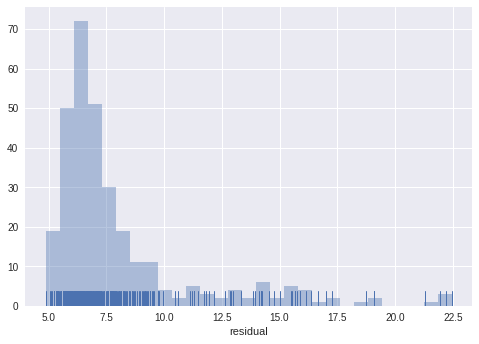

In [9]:
sns.distplot(df['residual'],  kde=False, rug=True)
plt.show()

In [10]:
len(df)

312

In [11]:
plt.close()

In [12]:
residuals = df['residual'].values.tolist()

In [13]:
np.max(residuals) - np.min(residuals)

17.569008827209473

In [14]:
df['residual']

107    22.445679
96     22.209061
223    21.943884
260    21.312656
1      19.104511
172    19.102757
132    18.733578
189    17.261202
123    17.027338
75     16.665009
261    16.365294
99     16.160429
188    15.886932
296    15.880463
228    15.774359
129    15.651378
120    15.649096
212    15.558990
195    15.478443
185    15.016891
156    14.751730
73     14.522700
250    14.256907
229    14.209027
253    14.204046
294    14.188695
186    14.107855
34     13.941818
77     13.839870
184    13.320699
         ...    
275     5.675032
243     5.663660
270     5.637288
310     5.623937
155     5.622227
48      5.616734
242     5.603206
5       5.550658
239     5.550035
35      5.548527
9       5.488330
216     5.442971
27      5.425073
225     5.415268
139     5.400080
39      5.392486
29      5.378057
60      5.366636
151     5.363937
255     5.362718
78      5.345079
200     5.316303
232     5.312134
198     5.222681
144     5.215228
233     5.212704
87      5.160297
7       5.1099

In [15]:
def RadiantDireDifference(row, column):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    radiantSum = 0
    direSum = 0
    for pos in poss:
        radiantSum += row['radiant_'+ pos + '_' + column]
        direSum += row['dire_'+ pos + '_' + column]
    return radiantSum - direSum

def reject_outliers(data, m=1.5):
    return abs(data - np.mean(data)) < m * np.std(data)

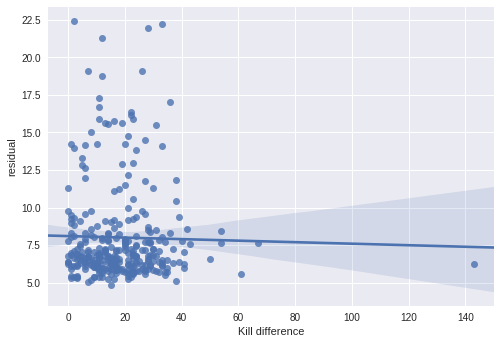

In [16]:
kill_difference = np.abs(df.apply(RadiantDireDifference, args=('kills',), axis=1))
sns.regplot(kill_difference, df['residual'])
ax = plt.gca()
ax.set_xlabel("Kill difference")
plt.show()

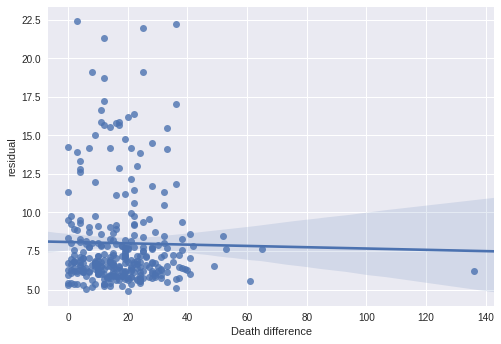

In [17]:
death_difference = df.apply(RadiantDireDifference, args=('deaths',), axis=1)
sns.regplot(np.abs(death_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("Death difference")
plt.show()

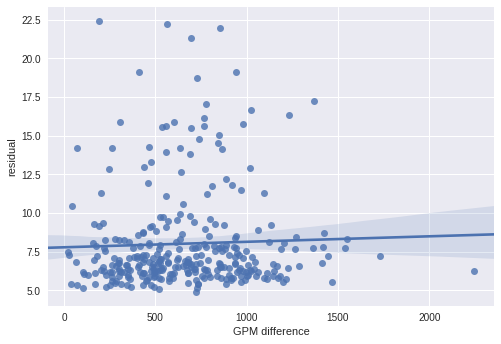

In [18]:
gold_difference = df.apply(RadiantDireDifference, args=('gpm',), axis=1)
sns.regplot(np.abs(gold_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("GPM difference")
plt.show()

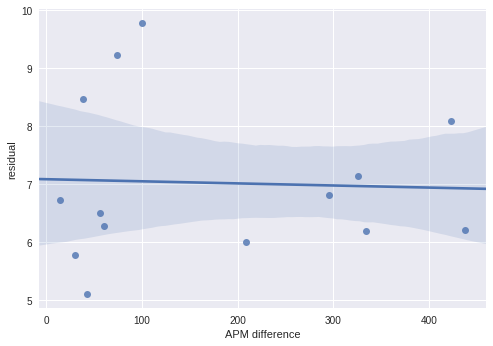

In [19]:
apm_difference = df.apply(RadiantDireDifference, args=('apm',), axis=1)
sns.regplot(np.abs(apm_difference), df['residual'])
ax = plt.gca()
ax.set_xlabel("APM difference")
plt.show()

In [20]:
df[df['residual'] > 17]

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_rune_pickups,dire_pos3_rune_pickups,dire_pos4_rune_pickups,dire_pos5_rune_pickups,radiant_pos1_rune_pickups,radiant_pos2_rune_pickups,radiant_pos3_rune_pickups,radiant_pos4_rune_pickups,radiant_pos5_rune_pickups,residual
107,3123855360,0,0,151,False,2994,NaN,NaN,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.445679
96,3123250944,0,0,9,True,2109,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.209061
223,3123836672,0,0,389,True,2154,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.943884
260,3123892992,0,0,198,False,2563,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.312656
1,3123906560,0,0,85,True,2385,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.104511
172,3123800064,0,0,54,False,2734,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.102757
132,3123271936,0,0,232,False,2849,NaN,NaN,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.733578
189,3123365632,0,0,165,True,2006,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.261202
123,3123284224,0,0,19,False,3010,NaN,NaN,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.027338


In [21]:
df[df['residual'] < 7.5].sample(10, random_state=1)

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_rune_pickups,dire_pos3_rune_pickups,dire_pos4_rune_pickups,dire_pos5_rune_pickups,radiant_pos1_rune_pickups,radiant_pos2_rune_pickups,radiant_pos3_rune_pickups,radiant_pos4_rune_pickups,radiant_pos5_rune_pickups,residual
279,3123844608,0,0,130,True,2037,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.858028
196,3123609088,0,0,340,True,347,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.004716
168,3123626496,0,0,62,False,3204,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.142385
48,3123335936,0,0,90,True,2456,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.616734
278,3123910400,0,0,0,False,2987,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.289255
215,3123541760,0,0,169,False,3181,NaN,NaN,33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.985984
88,3123681792,0,0,258,True,1935,NaN,NaN,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.813500
277,3123708928,0,0,523,False,3583,19.0,0.0,19,167.0,...,12.0,8.0,11.0,19.0,6.0,10.0,13.0,19.0,15.0,7.135561
95,3123819264,0,0,286,True,2778,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.686644
187,3123487744,0,0,76,False,2431,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.361912
